# Group Exercise 1 - Data Preprocessing on a Real Dataset

## Dataset Information
**Name**: BigMart Sales Dataset  
**Source**: [https://www.kaggle.com/code/mragpavank/big-mart-sales-data/input]

**Description**: This dataset contains sales data from BigMart outlets across different cities. It includes product attributes (weight, visibility, type, MRP) and outlet characteristics (size, location, type) to predict sales performance.


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df = pd.read_csv('BigMart_Sales.csv')
print("Dataset shape:", df.shape)
print("\nColumn types:")
print(df.dtypes)

Dataset shape: (5681, 11)

Column types:
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object


## 1. Handling Missing Values (Done by Shruti Bhandari)

In [3]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [4]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


## 2. Scaling Numerical Features (Done by Shruti Bhandari)

### 2.1 Z-Score Standardization 

In [5]:
numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

scaler_z = StandardScaler()
df_zscore = pd.DataFrame(
    scaler_z.fit_transform(df[numerical_cols]),
    columns=[f'{col}_zscore' for col in numerical_cols]
)

print("Z-score standardization (first 5 rows):")
print(df_zscore.head())

Z-score standardization (first 5 rows):
   Item_Weight_zscore  Item_Visibility_zscore  Item_MRP_zscore  \
0        1.897460e+00               -1.134077        -0.536555   
1       -1.035530e+00               -0.531850        -0.868937   
2        4.486336e-01                0.661316         1.629848   
3       -1.267578e+00               -0.981416         0.226697   
4        4.184768e-16                1.032540         1.508110   

   Outlet_Establishment_Year_zscore  
0                          0.139891  
1                          1.095512  
2                          0.020438  
3                          1.095512  
4                         -1.532446  


### 2.2 Min–Max Normalization 

In [6]:
scaler_mm = MinMaxScaler()
df_minmax = pd.DataFrame(
    scaler_mm.fit_transform(df[numerical_cols]),
    columns=[f'{col}_minmax' for col in numerical_cols]
)

print("Min-Max normalization (first 5 rows):")
print(df_minmax.head())

Min-Max normalization (first 5 rows):
   Item_Weight_minmax  Item_Visibility_minmax  Item_MRP_minmax  \
0            0.964275                0.023374         0.323413   
1            0.222983                0.118737         0.235849   
2            0.598095                0.307674         0.894140   
3            0.164335                0.047548         0.524488   
4            0.484706                0.366458         0.862069   

   Outlet_Establishment_Year_minmax  
0                          0.583333  
1                          0.916667  
2                          0.541667  
3                          0.916667  
4                          0.000000  


### 2.3 Explaining the Difference

In [7]:
print("Difference:")
print("\nZ-score: (x - mean) / std, range unbounded, mean=0, std=1")
print("Min-Max: (x - min) / (max - min), range [0,1]")

Difference:

Z-score: (x - mean) / std, range unbounded, mean=0, std=1
Min-Max: (x - min) / (max - min), range [0,1]


## 3. Handling Noise  :  (Done by Saniya Shaikh)

In [8]:
import pandas as pd
df = pd.read_csv("BigMart_Sales.csv")


### 3.1 Choosing a numerical feature 

In [9]:
feature = "Item_MRP"


### 3.2 Injecting Artificial Noise  

In [10]:
import numpy as np



In [11]:
np.random.seed(42)  



In [12]:
noise = np.random.normal(
    loc=0,
    scale=df[feature].std() * 0.2,
    size=len(df)
)


In [13]:
df["Item_MRP_noisy"] = df[feature] + noise

### 3.3 Applying Smoothing (Rolling Mean)    

In [14]:
df["Item_MRP_smoothed"] = (
    df["Item_MRP_noisy"]
    .rolling(window=10, min_periods=1)
    .mean()
)

### 3.4 Before vs After Visualization 

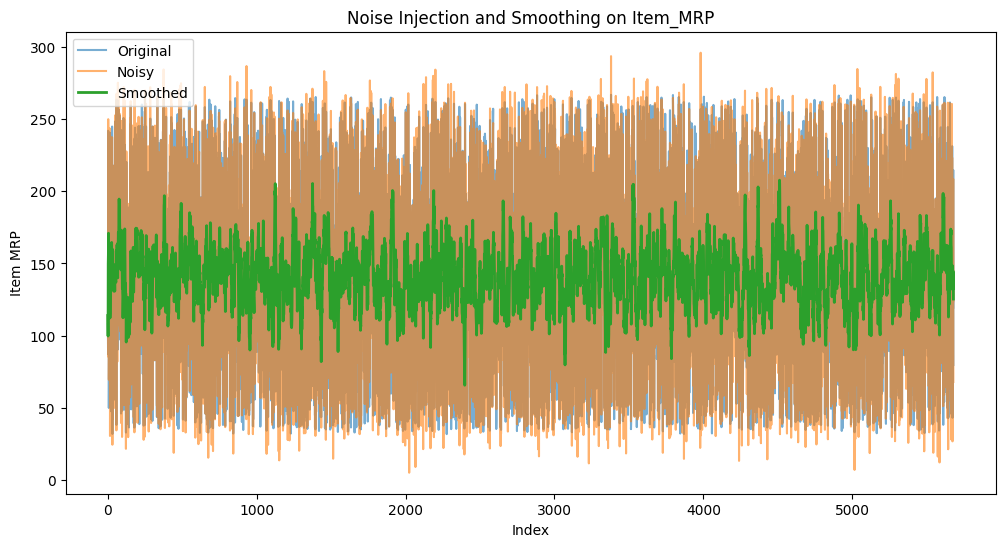

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(df[feature].reset_index(drop=True),
         label="Original",
         alpha=0.6)

plt.plot(df["Item_MRP_noisy"].reset_index(drop=True),
         label="Noisy",
         alpha=0.6)

plt.plot(df["Item_MRP_smoothed"].reset_index(drop=True),
         label="Smoothed",
         linewidth=2)

plt.title("Noise Injection and Smoothing on Item_MRP")
plt.xlabel("Index")
plt.ylabel("Item MRP")
plt.legend()
plt.show()


 Artificial Gaussian noise was injected into the Item_MRP feature to simulate real-world measurement variability. A rolling mean smoothing technique was applied to reduce short-term fluctuations introduced by noise while preserving the overall trend of the data. This demonstrates how smoothing can be used to handle noisy numerical features in real-world datasets.   

 Excessive smoothing may remove important patterns; therefore, the window size must be chosen carefully. 

## 4. Handling Outliers: (Done by Sakshi Manjrekar)

In [16]:
import pandas as pd
import numpy as np


### 4.1 Detect outliers using Z-score 

In [17]:
num_cols = df.select_dtypes(include=[np.number]).columns
z_scores = (df[num_cols] - df[num_cols].mean()) / df[num_cols].std()
threshold = 3
outliers = (np.abs(z_scores) > threshold)
print(outliers.sum())

Item_Weight                   0
Item_Visibility              81
Item_MRP                      0
Outlet_Establishment_Year     0
Item_MRP_noisy                0
Item_MRP_smoothed            14
dtype: int64


### 4.2 Handling them via removal or transformation 

In [18]:
df_transformed = df.copy()
for col in num_cols:
    if (df_transformed[col] > 0).all():
        df_transformed[col] = np.log1p(df_transformed[col])
        
df_transformed.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_MRP_noisy,Item_MRP_smoothed
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,4.690083,OUT049,7.600902,Medium,Tier 1,Supermarket Type1,4.744954,4.744954
1,FDW14,8.300,reg,0.038428,Dairy,4.480964,OUT017,7.604894,NaN,Tier 2,Supermarket Type1,4.461422,4.613203
2,NCN55,14.600,Low Fat,0.099575,Others,5.492048,OUT010,7.600402,NaN,Tier 3,Grocery Store,5.524498,5.015896
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,5.050074,OUT017,7.604894,NaN,Tier 2,Supermarket Type1,5.163994,5.055027
4,FDY38,NaN,Regular,0.118599,Dairy,5.460564,OUT027,7.593878,Medium,Tier 3,Supermarket Type3,5.448182,5.146995


### 4.2 Comparing Original and Transformed

In [19]:
comparison = pd.DataFrame({
    'Original': df[col],
    'Transformed': df_transformed[col]
})

comparison.head()


,Original,Transformed
0,114.002490,4.744954
1,99.806546,4.613203
2,149.791167,5.015896
3,155.808729,5.055027
4,170.914071,5.146995


### 4.3 Justification of Approach 

The outliers were first detected using the Z-score method. After identifying outliers, they were handled using log transformation. I created a copy was original data and avoid permanent modification during preprocessing. The 'log1p' transformation was selected because it reduces the influence of extreme values by compressing large ranges while maintaining the relative differences between data points. This approach is particularly suitable for datasets such as retail sales data, where large values often represent genuine high sales rather than errors. By applying this transformation, dataset becomes more balanced and better suited suited for statistical analysis and machine learning models.

#  5. Feature Selection: (Done By Hadassah Mercy)

In [20]:
import pandas as pd
import numpy as np

df = pd.read_csv("BigMart_Sales.csv")

### 5.1 Select only numerical Columns 

In [21]:
num_df = df.select_dtypes(include=[np.number])

print("Numerical columns:")
print(num_df.columns)


Numerical columns:
Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


### 5.2 Compute Correlation Matrix 

In [22]:
corr_matrix = num_df.corr()
print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
                           Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.019089  0.049809   
Item_Visibility              -0.019089         1.000000 -0.014013   
Item_MRP                      0.049809        -0.014013  1.000000   
Outlet_Establishment_Year     0.018918        -0.097040 -0.007233   

                           Outlet_Establishment_Year  
Item_Weight                                 0.018918  
Item_Visibility                            -0.097040  
Item_MRP                                   -0.007233  
Outlet_Establishment_Year                   1.000000  


### 5.3 Correlation with Target Variable 

In [23]:
print(df.columns)


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


### 5.4 Identify highly correlated features 

### Threshold 0.8

In [24]:
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

high_corr_features = [
    column for column in upper_triangle.columns
    if any(upper_triangle[column] > 0.8)
]

print("Highly correlated features:")
print(high_corr_features)


Highly correlated features:
[]


### 5.5 Drop redundant features (if any) 

In [25]:
df_selected = df.drop(columns=high_corr_features)

print("Remaining columns after feature selection:")
print(df_selected.columns)


Remaining columns after feature selection:
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


## Justification of Approach 

A filter-based feature selection method using correlation analysis between numerical features was applied. The correlation matrix was computed to measure the linear relationship among numerical variables. Features with a correlation coefficient greater than 0.8 were considered highly correlated and redundant.

Such highly correlated features were removed to reduce multicollinearity and redundancy in the dataset. This method was chosen because it is simple, computationally efficient, and does not require a target variable. It helps improve data quality by retaining only the most informative and non-redundant features before applying machine learning models.

## Final step: Save the preprocessed dataset as CSV (Done by Saniya Shaikh)

In [ ]:
 
df.to_csv('BigMart_preprocessed_final.csv', index=False)
print("Final preprocessed dataset saved as 'BigMart_preprocessed_final.csv'")
print("Shape:", df.shape)
print(df.head())


Final preprocessed dataset saved as 'BigMart_preprocessed_final.csv'
Shape: (5681, 11)
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medi